In [1]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif']=['FangSong']
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from pipe_fn import infix, and_then
from linq.standard.general import Map
from skimage import color, data, restoration
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
from playground import gaussian_noise, poisson_noise  # 复用`空间滤波`问题里的代码

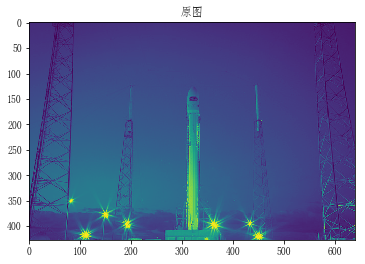

In [2]:
img  = color.rgb2gray(data.rocket())
plt.imshow(img)
plt.title('原图')
plt.show()

In [3]:
_size = 7
kernel_motion_blur = np.zeros((_size, _size))  # kernel of motion blur
kernel_motion_blur[(_size-1)//2, :] = np.ones(_size)
kernel_motion_blur = kernel_motion_blur / np.sum(kernel_motion_blur)


def motion_blur(img):
    return convolve2d(img, kernel_motion_blur, mode='same')

def gaussian_blur(img):
    return gaussian_filter(img, sigma=1)

blurs = [motion_blur, gaussian_blur]
noises = [gaussian_noise, poisson_noise]

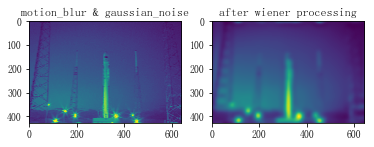

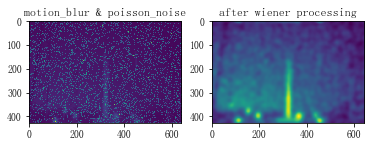

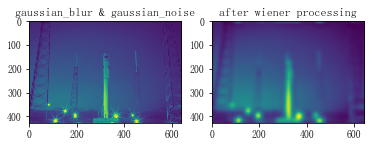

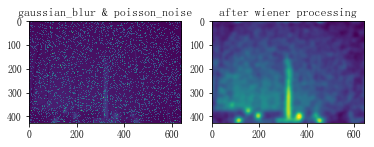

In [11]:
psf = np.ones((11, 11)) / (11**2)
for blur in blurs:
    for noise in noises:
        noised = and_then(blur, noise)(img)
        plt.subplot(121)
        plt.imshow(noised)
        plt.title(f'{blur.__name__} & {noise.__name__}')
        deconvolved_img = restoration.wiener(noised, psf, 1100)
        plt.subplot(122)
        plt.imshow(deconvolved_img)
        plt.title(f'after wiener processing')
        plt.show()
        